In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1.Emoticon Dataset

##Data Analysis

  input_emoticon  label
0  😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣      0
1  🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼      0
2  😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼      0
3  😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯      1
4  🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼      1

Missing values in each column:
input_emoticon    0
label             0
dtype: int64

Dataset statistics:
             label
count  7080.000000
mean      0.494915
std       0.500009
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


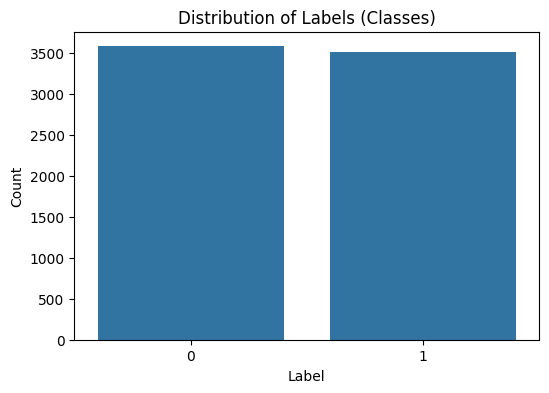

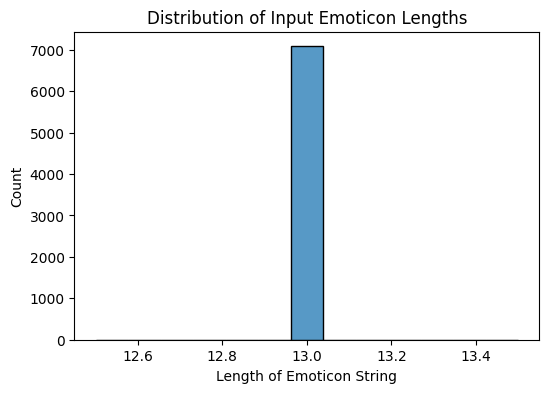

  input_emoticon  label  input_length  \
0  😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣      0            13   
1  🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼      0            13   
2  😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼      0            13   
3  😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯      1            13   
4  🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼      1            13   

                                      unicode_values  
0  [128539, 128720, 128571, 128529, 128547, 12860...  
1  [128720, 128529, 128554, 128539, 128700, 12862...  
2  [128539, 128623, 128529, 128673, 128547, 12870...  
3  [128539, 128700, 128720, 128592, 128547, 12862...  
4  [128720, 128671, 128700, 128539, 128587, 12852...  


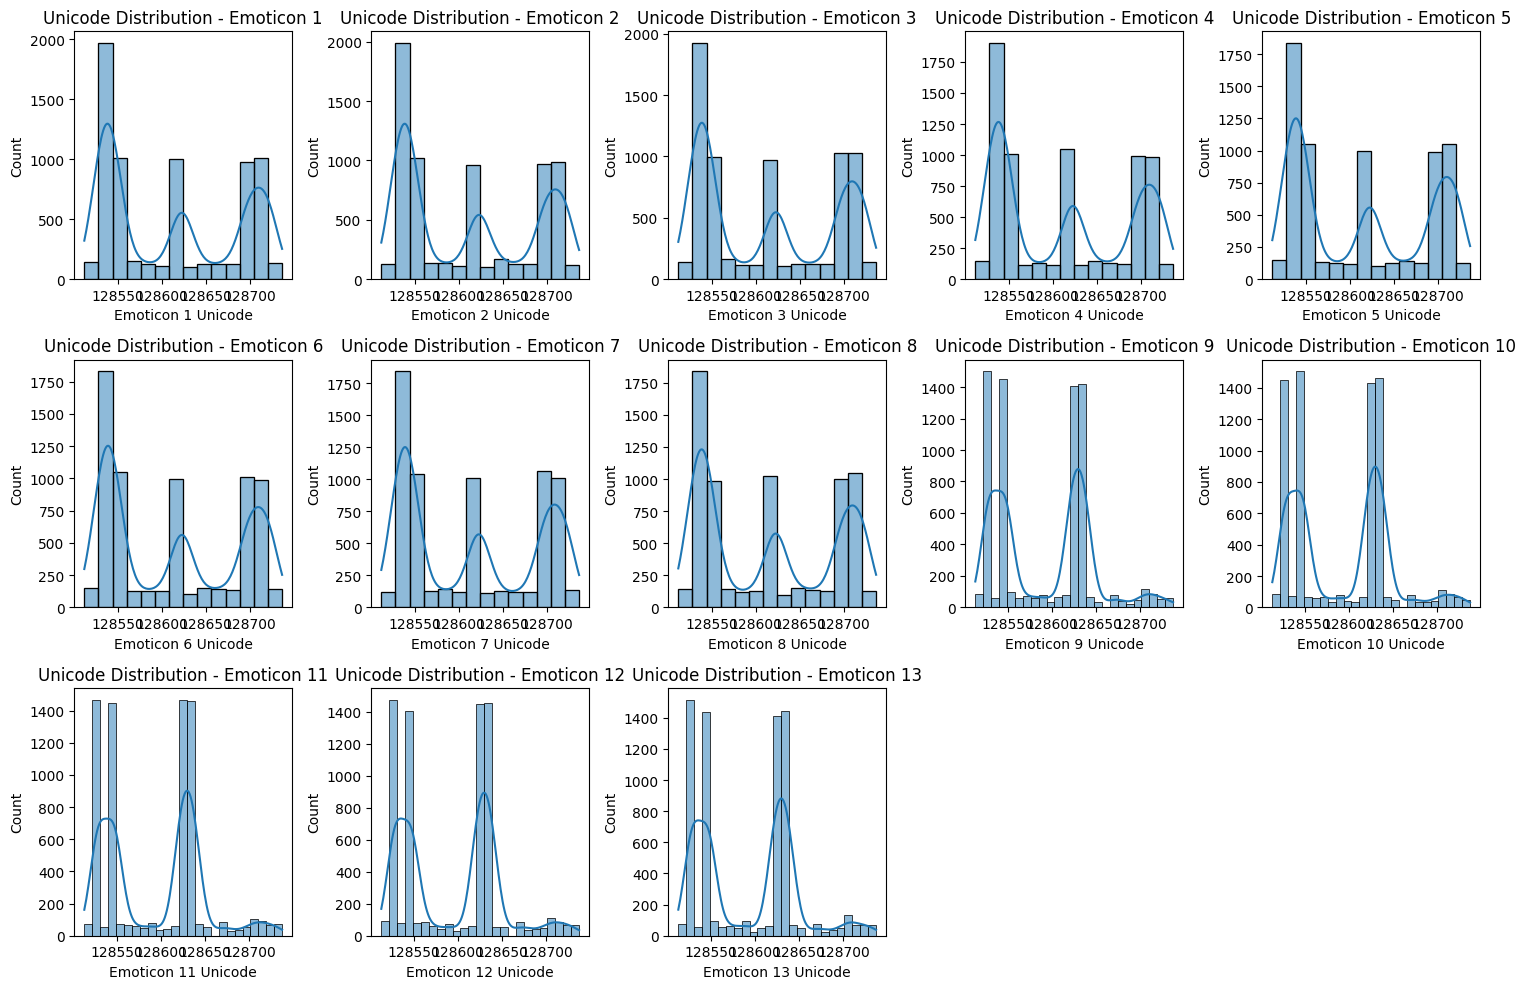

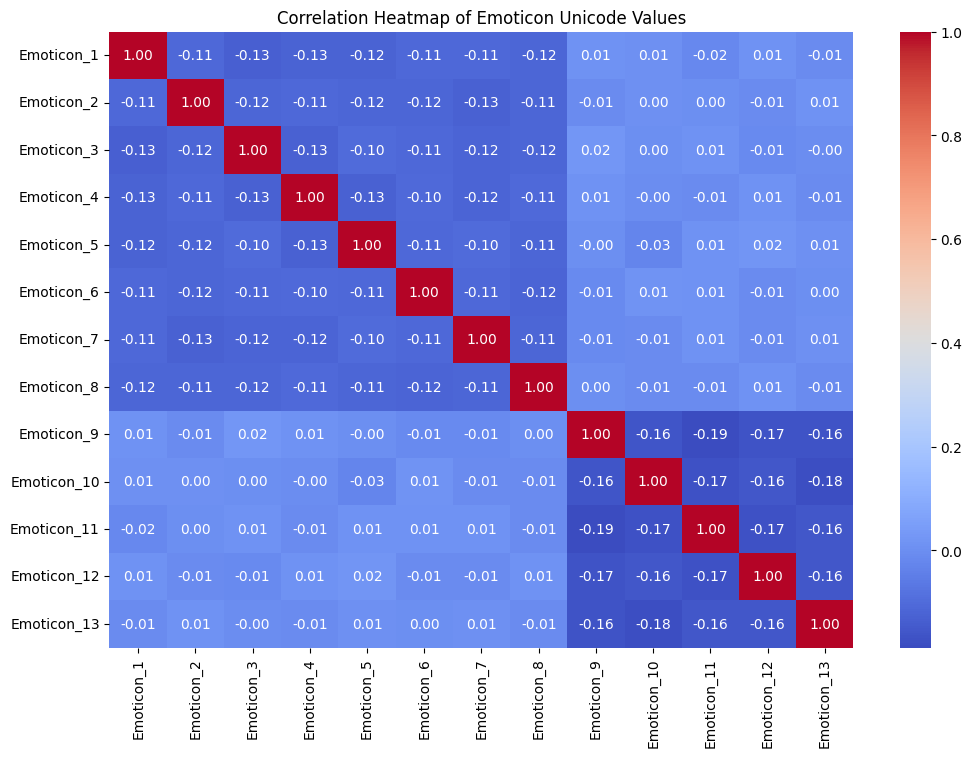


Correlation of each emoticon with the label:
label          1.000000
Emoticon_2     0.031980
Emoticon_3     0.023023
Emoticon_8     0.018183
Emoticon_4     0.017427
Emoticon_1     0.017331
Emoticon_5     0.014553
Emoticon_7     0.007325
Emoticon_9    -0.008491
Emoticon_6    -0.009994
Emoticon_11   -0.026907
Emoticon_12   -0.032255
Emoticon_13   -0.038885
Emoticon_10   -0.046678
Name: label, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from the specified path
data = pd.read_csv('./drive/MyDrive/datasets/train/train_emoticon.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check for missing values in each column of the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

# Generate basic statistics about the dataset (mean, std, min, max, etc.)
print("\nDataset statistics:")
print(data.describe())

# Visualize the distribution of labels (binary classes 0 and 1)
plt.figure(figsize=(6, 4))  # Set the figure size
sns.countplot(x='label', data=data)  # Countplot for label distribution
plt.title("Distribution of Labels (Classes)")  # Set the title of the plot
plt.xlabel("Label")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.show()  # Display the plot

# Create a new column for the length of each input string
data['input_length'] = data['input_emoticon'].apply(len)  # Calculate string lengths

# Visualize the distribution of input emoticon lengths
plt.figure(figsize=(6, 4))  # Set the figure size
sns.histplot(data['input_length'], kde=False, bins=13)  # Histogram for input lengths
plt.title("Distribution of Input Emoticon Lengths")  # Set the title of the plot
plt.xlabel("Length of Emoticon String")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.show()  # Display the plot

# Function to convert emoticons to their Unicode integer values
def convert_to_unicode(input_emoticons):
    # Convert each emoticon to its Unicode value; replace '□' with 0
    unicode_values = [ord(emoticon) if emoticon != '□' else 0 for emoticon in input_emoticons]
    # Calculate the mean Unicode for filling missing values
    mean_unicode = np.nanmean(unicode_values)
    # Replace any NaN values with the calculated mean
    unicode_values = [int(val) if not np.isnan(val) else int(mean_unicode) for val in unicode_values]
    return unicode_values  # Return the list of Unicode values

# Apply the conversion function to create a new column for Unicode values
data['unicode_values'] = data['input_emoticon'].apply(convert_to_unicode)
print(data.head())  # Display updated DataFrame with Unicode values

# Visualize the distribution of Unicode values for each position in the 13-emoticon string
unicode_df = pd.DataFrame(data['unicode_values'].tolist())  # Convert list of Unicode values into a DataFrame
# Name the columns for clarity, corresponding to each emoticon position
unicode_df.columns = [f"Emoticon_{i+1}" for i in range(13)]

# Create subplots for each emoticon's Unicode distribution
plt.figure(figsize=(15, 10))  # Set figure size for subplots
for i in range(13):
    plt.subplot(3, 5, i+1)  # Create a grid of subplots (3 rows, 5 columns)
    sns.histplot(unicode_df[f'Emoticon_{i+1}'], kde=True)  # Histogram with KDE for each emoticon
    plt.title(f"Unicode Distribution - Emoticon {i+1}")  # Title for each subplot
    plt.xlabel(f"Emoticon {i+1} Unicode")  # Label for x-axis
    plt.ylabel("Count")  # Label for y-axis
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()  # Display all subplots

# Create a correlation heatmap between Unicode values of emoticons
plt.figure(figsize=(12, 8))  # Set the figure size for the heatmap
sns.heatmap(unicode_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Generate the heatmap
plt.title("Correlation Heatmap of Emoticon Unicode Values")  # Set title for the heatmap
plt.show()  # Display the heatmap

# Calculate and display correlation between each emoticon and the target label
unicode_df['label'] = data['label']  # Add the label column to the Unicode DataFrame
# Calculate correlation with the label and sort values in descending order
correlation_with_label = unicode_df.corr()['label'].sort_values(ascending=False)
print("\nCorrelation of each emoticon with the label:")
print(correlation_with_label)  # Print the correlation values

##Attempt 1

Loading data...
Preprocessing data using One-Hot Encoding...
Training models with different data fractions...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:07:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:07:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:07:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:07:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:08:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Plotting learning curve...


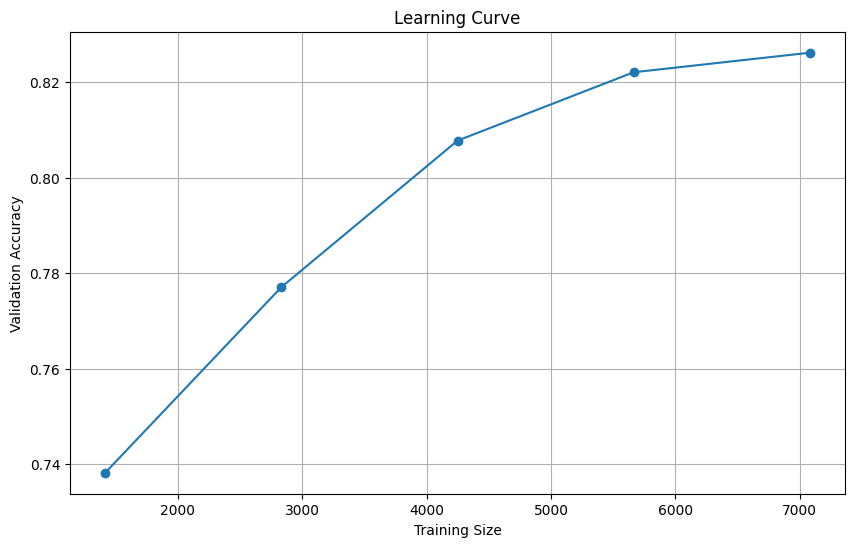


Analyzing feature importance...


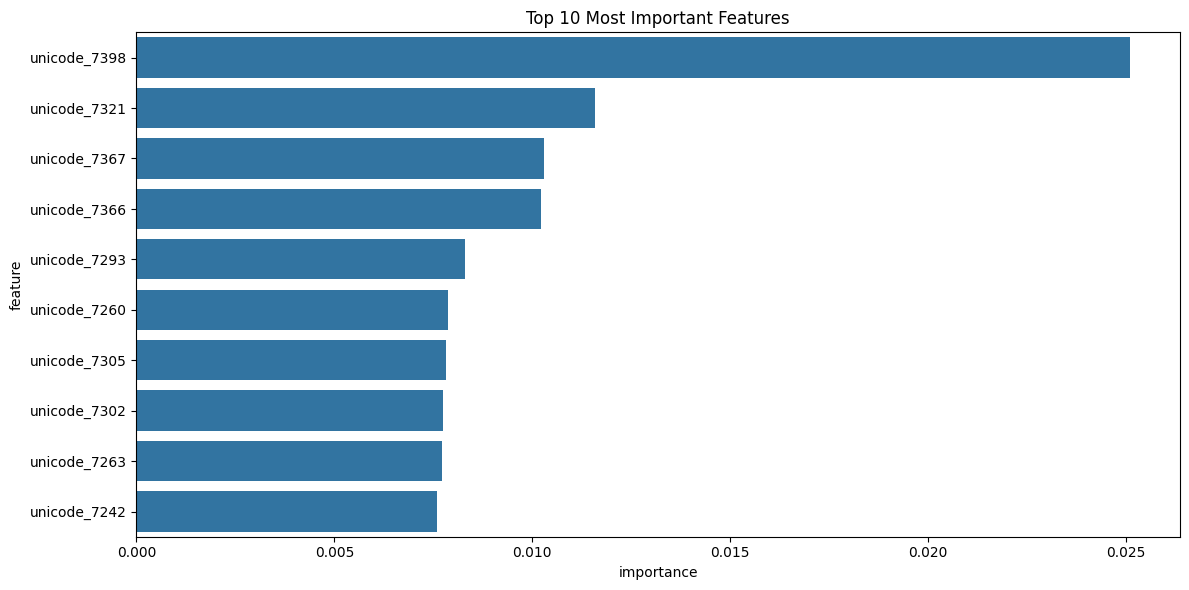


Results for different training data fractions:
   fraction  validation_accuracy  training_size
0       0.2             0.738241           1416
1       0.4             0.777096           2832
2       0.6             0.807771           4248
3       0.8             0.822086           5664
4       1.0             0.826176           7080

Making predictions on test set...
Saving predictions to file...

Execution completed successfully!


In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced plotting capabilities
import xgboost as xgb  # For the XGBoost machine learning model
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For data preprocessing
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.compose import ColumnTransformer  # For transforming columns in a DataFrame
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
from sklearn.model_selection import StratifiedKFold  # For cross-validation

# Function to load datasets from CSV files
def load_data():
    # Load training, validation, and test datasets
    train_data = pd.read_csv('./drive/MyDrive/datasets/train/train_emoticon.csv')
    valid_data = pd.read_csv('./drive/MyDrive/datasets/valid/valid_emoticon.csv')
    test_data = pd.read_csv('./drive/MyDrive/datasets/test/test_emoticon.csv')

    # Return the loaded datasets
    return train_data, valid_data, test_data

# Function to perform One-Hot Encoding on emoticons
def one_hot_encode_emoticons(train_data, valid_data, test_data, max_length=13):
    # Initialize OneHotEncoder to convert categorical variables into a format that can be provided to ML algorithms
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Function to pad or truncate Unicode values to ensure fixed length
    def pad_or_truncate(unicode_values):
        # If the length is less than max_length, pad with zeros; if more, truncate to max_length
        return unicode_values[:max_length] + [0] * (max_length - len(unicode_values))

    # Function to extract features from emoticon strings
    def extract_and_encode_features(emoticon_string):
        # Convert each emoticon in the string to its Unicode value
        unicode_values = [ord(c) for c in emoticon_string]

        # Create position-based features by dividing the emoticons into two parts
        front_features = unicode_values[:8]  # First 8 emoticons
        back_features = unicode_values[8:]   # Last 5 emoticons

        # Calculate statistical features (mean and standard deviation) for both segments
        front_mean = np.mean(front_features)
        front_std = np.std(front_features)
        back_mean = np.mean(back_features)
        back_std = np.std(back_features)

        # Return combined features: position-based features and statistical features
        return front_features + back_features + [
            front_mean, front_std, back_mean, back_std
        ]

    # Apply feature extraction to training, validation, and test datasets
    train_features = np.array([extract_and_encode_features(x) for x in train_data['input_emoticon']])
    valid_features = np.array([extract_and_encode_features(x) for x in valid_data['input_emoticon']])
    test_features = np.array([extract_and_encode_features(x) for x in test_data['input_emoticon']])

    # Fit the encoder on training data and transform all datasets
    train_encoded = encoder.fit_transform(train_features)
    valid_encoded = encoder.transform(valid_features)
    test_encoded = encoder.transform(test_features)

    # Return the encoded datasets for training, validation, and testing
    return train_encoded, valid_encoded, test_encoded

# Function to analyze feature importance from the trained model
def analyze_feature_importance(model, X):
    # Create dynamic feature names for the encoded features
    feature_names = [f'unicode_{i}' for i in range(X.shape[1])]  # Create feature names based on the number of features
    importances = model.named_steps['classifier'].feature_importances_  # Extract feature importances from the model

    # Create a DataFrame to store feature names and their corresponding importance
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)  # Sort by importance in descending order

    # Return the DataFrame containing feature importances
    return importance_df

# Function to create an enhanced model using a pipeline
def create_enhanced_emoticon_model():
    # Create a pipeline that first scales the data and then applies the XGBoost classifier
    return Pipeline([
        ('scaler', StandardScaler()),  # Step to scale features after one-hot encoding
        ('classifier', xgb.XGBClassifier(
            use_label_encoder=False, eval_metric='logloss',  # Settings for XGBoost
            colsample_bytree=0.8, learning_rate=0.2,
            max_depth=5, n_estimators=300, subsample=1.0
        ))
    ])

# Function to train the model with different subsets of the training data
def train_with_validation(X_train, y_train, X_valid, y_valid):
    fractions = [0.2, 0.4, 0.6, 0.8, 1.0]  # Different fractions of training data to evaluate
    results = []  # List to store results
    models = {}  # Dictionary to store trained models

    # Iterate through each fraction to train and evaluate the model
    for fraction in fractions:
        n_samples = int(len(X_train) * fraction)  # Calculate number of samples for the current fraction
        X_subset = X_train[:n_samples]  # Subset of features
        y_subset = y_train[:n_samples]  # Subset of labels

        # Create and train the model
        model = create_enhanced_emoticon_model()
        model.fit(X_subset, y_subset)  # Train the model on the subset

        # Evaluate the model on the validation set
        valid_score = model.score(X_valid, y_valid)  # Calculate validation accuracy
        models[fraction] = model  # Store the trained model

        # Append results to the results list
        results.append({
            'fraction': fraction,
            'validation_accuracy': valid_score,
            'training_size': n_samples
        })

    # Return models and a DataFrame containing results
    return models, pd.DataFrame(results)

# Function for cross-validation training and evaluation
def cv_train_evaluate(X, y, model, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)  # Initialize Stratified K-Fold
    scores = []  # List to store scores for each fold

    # Iterate through each fold for training and validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X[train_idx], X[val_idx]  # Split data into training and validation
        y_train, y_val = y[train_idx], y[val_idx]  # Split labels accordingly

        # Train the model on the training data
        model.fit(X_train, y_train)
        score = model.score(X_val, y_val)  # Evaluate and store the score
        scores.append(score)

    # Return the mean and standard deviation of the scores
    return np.mean(scores), np.std(scores)

# Function to plot the learning curve
def plot_learning_curve(results):
    plt.figure(figsize=(10, 6))  # Set the figure size for the learning curve plot
    plt.plot(results['training_size'], results['validation_accuracy'], marker='o')  # Plot accuracy vs training size
    plt.xlabel('Training Size')  # Label for the x-axis
    plt.ylabel('Validation Accuracy')  # Label for the y-axis
    plt.title('Learning Curve')  # Title of the plot
    plt.grid(True)  # Enable grid for better readability
    plt.show()  # Display the plot

# Function to plot feature importance
def plot_feature_importance(importance_df, top_n=10):
    plt.figure(figsize=(12, 6))  # Set the figure size for feature importance plot
    sns.barplot(x='importance', y='feature', data=importance_df.head(top_n))  # Bar plot for feature importance
    plt.title(f'Top {top_n} Most Important Features')  # Title for the plot
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the plot

# Main execution function
print("Loading data...")
train_data, valid_data, test_data = load_data()  # Load datasets

# Preprocess data using One-Hot Encoding
print("Preprocessing data using One-Hot Encoding...")
X_train, X_valid, X_test = one_hot_encode_emoticons(train_data, valid_data, test_data)

y_train = train_data['label']  # Extract labels for training
y_valid = valid_data['label']  # Extract labels for validation

# Train models and get results
print("Training models with different data fractions...")
models, results = train_with_validation(X_train, y_train, X_valid, y_valid)

# Plot learning curve
print("\nPlotting learning curve...")
plot_learning_curve(results)

# Analyze and plot feature importance for the model trained on full dataset
print("\nAnalyzing feature importance...")
final_model = models[1.0]  # Get the model trained on 100% of data
importance_df = analyze_feature_importance(final_model, X_train)  # Analyze importance
plot_feature_importance(importance_df)  # Plot importance

# Make predictions on training and validation sets
y1_train_pred = models[1.0].predict(X_train)  # Predictions on training set
y1_val_pred = models[1.0].predict(X_valid)  # Predictions on validation set

# Print results table for different training data fractions
print("\nResults for different training data fractions:")
print(results)  # Output results DataFrame

# Make predictions on test set using the best model
print("\nMaking predictions on test set...")
test_predictions = final_model.predict(X_test)  # Predict on test set

# Save predictions to file
print("Saving predictions to file...")
pd.DataFrame({'prediction': test_predictions}).to_csv('pred_emoticon.txt', index=False, header=False)  # Save predictions

print("\nExecution completed successfully!")  # Indicate successful completion

#Actual Best Model for the dataset 1

Loading data...
Preprocessing data using One-Hot Encoding...
Training models with different data fractions...

Plotting learning curve...


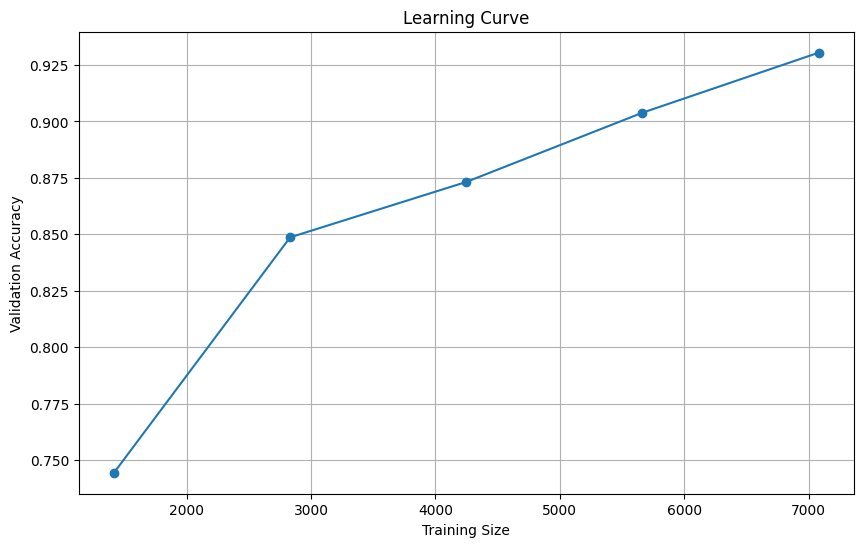


Results for different training data fractions:
   fraction  validation_accuracy  training_size
0       0.2             0.744376           1416
1       0.4             0.848671           2832
2       0.6             0.873211           4248
3       0.8             0.903885           5664
4       1.0             0.930470           7080

Making predictions on test set...
Saving predictions to file...

Execution completed successfully!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Data loading functions
def load_data():
    train_data = pd.read_csv('./drive/MyDrive/datasets/train/train_emoticon.csv')
    valid_data = pd.read_csv('./drive/MyDrive/datasets/valid/valid_emoticon.csv')
    test_data = pd.read_csv('./drive/MyDrive/datasets/test/test_emoticon.csv')

    return train_data, valid_data, test_data


# One-Hot Encoding function for emoticons
def one_hot_encode_emoticons(train_data, valid_data, test_data, max_length=13):
    def convert_to_unicode(input_emoticons):
        return [ord(emoticon) for emoticon in input_emoticons]

    def add_features(data):
        # Unicode values
        data['unicode_values'] = data['input_emoticon'].apply(convert_to_unicode)

        # Length of emoticon string
        data['emoticon_length'] = data['input_emoticon'].str.len()

        # Number of unique characters
        data['unique_chars'] = data['input_emoticon'].apply(lambda x: len(set(x)))

        # Presence of specific emoticon types (e.g., happy, sad)
        data['has_happy'] = data['input_emoticon'].str.contains('[:;][-]?[)D]').astype(int)
        data['has_sad'] = data['input_emoticon'].str.contains('[:;][-]?[(]').astype(int)

        # Advanced features
        data['unicode_range'] = data['unicode_values'].apply(lambda x: max(x) - min(x) if x else 0)
        data['unicode_mean'] = data['unicode_values'].apply(lambda x: sum(x)/len(x) if x else 0)

        return data

    train_data = add_features(train_data)
    valid_data = add_features(valid_data)
    test_data = add_features(test_data)

    # One-hot encoding for unicode values
    onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    train_encoded = onehot_encoder.fit_transform(np.array(train_data['unicode_values'].tolist()))
    valid_encoded = onehot_encoder.transform(np.array(valid_data['unicode_values'].tolist()))
    test_encoded = onehot_encoder.transform(np.array(test_data['unicode_values'].tolist()))

    # Combine one-hot encoded features with other numerical features
    numerical_features = ['emoticon_length', 'unique_chars', 'has_happy', 'has_sad', 'unicode_range', 'unicode_mean']
    train_features = np.hstack([train_encoded, train_data[numerical_features]])
    valid_features = np.hstack([valid_encoded, valid_data[numerical_features]])
    test_features = np.hstack([test_encoded, test_data[numerical_features]])

    return train_features, valid_features, test_features


# Model creation function
def create_enhanced_emoticon_model():
    # return  RandomForestClassifier(n_estimators=200, random_state=42, min_samples_leaf = 2, min_samples_split = 10, max_features= 'log2')
    return LogisticRegression(max_iter=10000, C = 8, penalty = 'l1', solver = 'liblinear')

# Training function
def train_with_validation(X_train, y_train, X_valid, y_valid):
    fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
    results = []
    models = {}

    for fraction in fractions:
        n_samples = int(len(X_train) * fraction)
        X_subset = X_train[:n_samples]
        y_subset = y_train[:n_samples]

        model = create_enhanced_emoticon_model()
        model.fit(X_subset, y_subset)

        valid_score = model.score(X_valid, y_valid)
        models[fraction] = model

        results.append({
            'fraction': fraction,
            'validation_accuracy': valid_score,
            'training_size': n_samples
        })

    return models, pd.DataFrame(results)

# Cross-Validation
def cv_train_evaluate(X, y, model, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model.fit(X_train, y_train)
        score = model.score(X_val, y_val)
        scores.append(score)

    return np.mean(scores), np.std(scores)

# Plotting functions
def plot_learning_curve(results):
    plt.figure(figsize=(10, 6))
    plt.plot(results['training_size'], results['validation_accuracy'], marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Validation Accuracy')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()


# Main execution function
print("Loading data...")
train_data, valid_data, test_data = load_data()

# Preprocess data using One-Hot Encoding
print("Preprocessing data using One-Hot Encoding...")
X_train, X_valid, X_test = one_hot_encode_emoticons(train_data, valid_data, test_data)


y_train = train_data['label']
y_valid = valid_data['label']

# Train models and get results
print("Training models with different data fractions...")
models, results = train_with_validation(X_train, y_train, X_valid, y_valid)

# Plot learning curve
print("\nPlotting learning curve...")
plot_learning_curve(results)

final_model = models[1.0]  # Get model trained on 100% of data


y1_train_pred = models[1.0].predict(X_train)
y1_valid_pred = models[1.0].predict(X_valid)

# Print results table
print("\nResults for different training data fractions:")
print(results)

# Make predictions on test set using best model
print("\nMaking predictions on test set...")
test_predictions = final_model.predict(X_test)

# Save predictions to file
print("Saving predictions to file...")
pd.DataFrame({'prediction': test_predictions}).to_csv('pred_emoticon.txt', index=False, header=False)

print("\nExecution completed successfully!")

#time = 25s

#2.Deep Features Dataset

##Data Analysis

Original Feature Shape (X): (7080, 9984)
Filtered Feature Shape (X): (7080, 2304)
Label Shape (Y): (7080, 1)
Missing values in features: 0
Missing values in labels: 0
Feature dataset statistics:
               768          769          770          771          772   \
count  7080.000000  7080.000000  7080.000000  7080.000000  7080.000000   
mean     -0.011058    -0.054146     0.078980     0.026241    -0.023769   
std       0.098130     0.116017     0.065722     0.119714     0.113431   
min      -0.234311    -0.284736    -0.077757    -0.306782    -0.314561   
25%      -0.070688    -0.121159     0.035041    -0.048077    -0.089553   
50%      -0.017029    -0.066379     0.073523     0.025493    -0.026600   
75%       0.056267     0.037797     0.112607     0.097850     0.072340   
max       0.245872     0.224787     0.292005     0.342570     0.201680   

              773          774          775          776          777   ...  \
count  7080.000000  7080.000000  7080.000000  7080.000000 

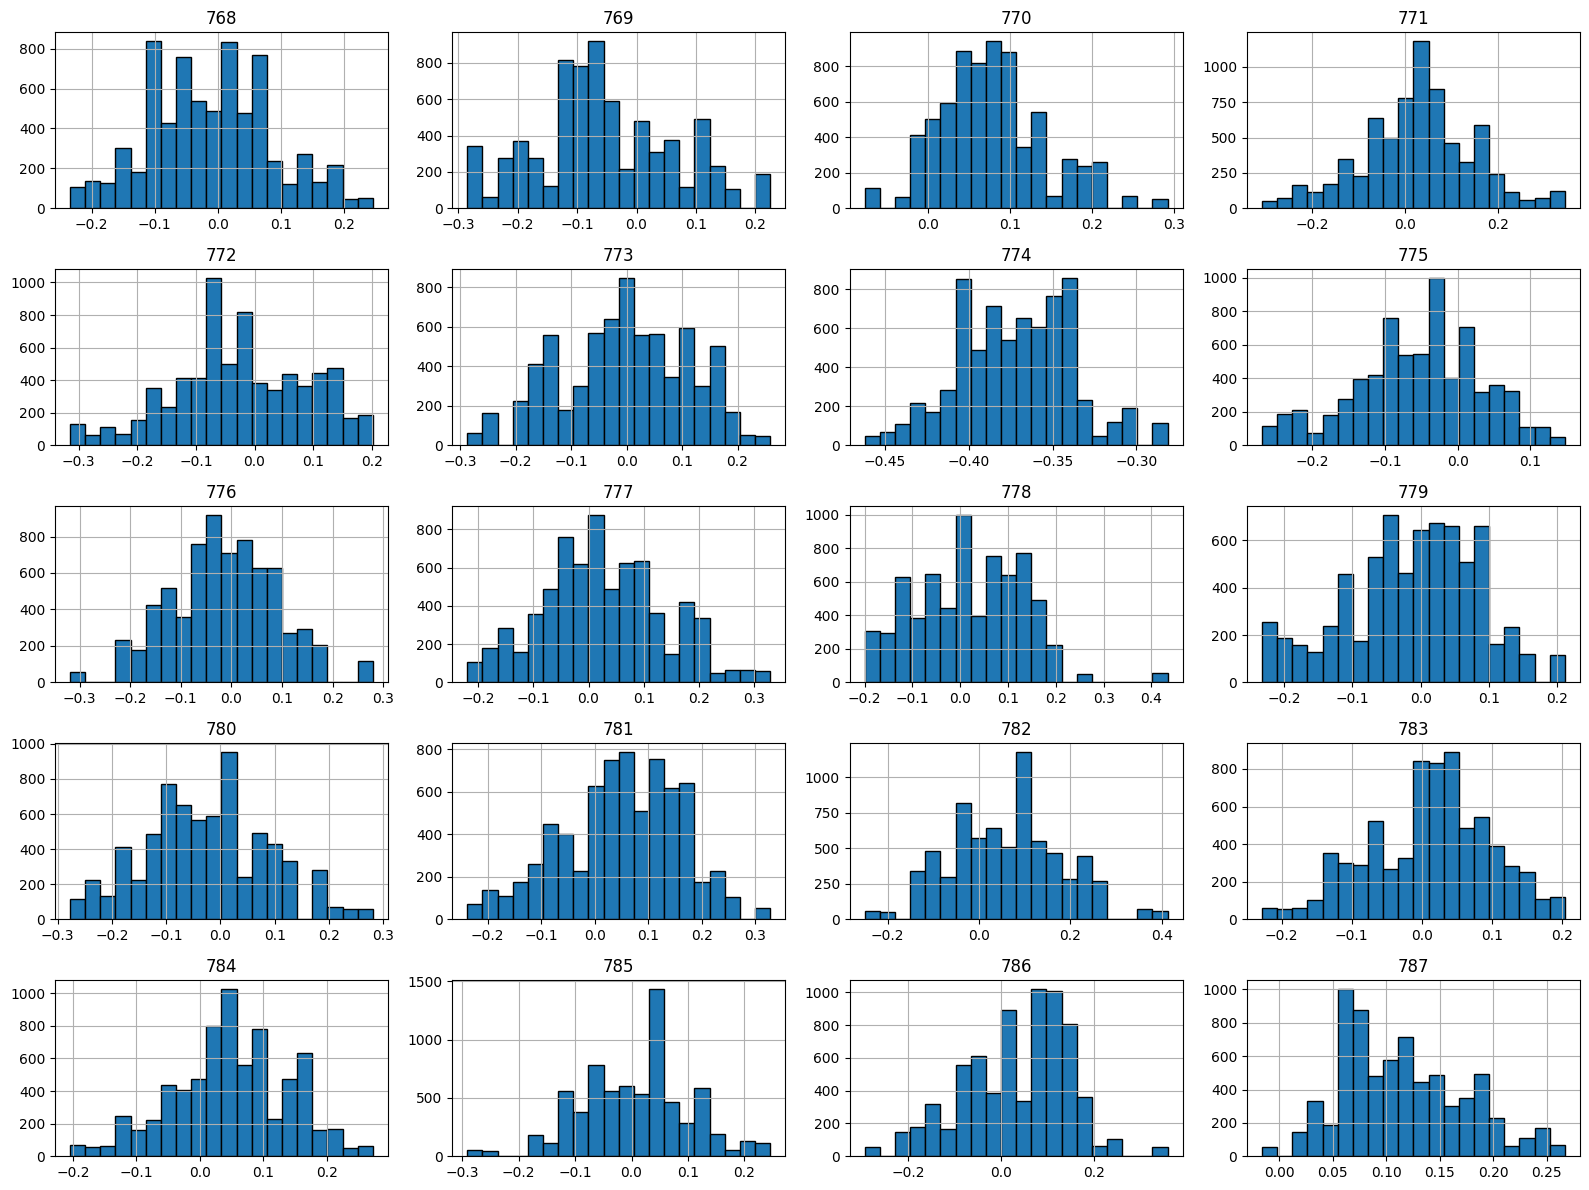

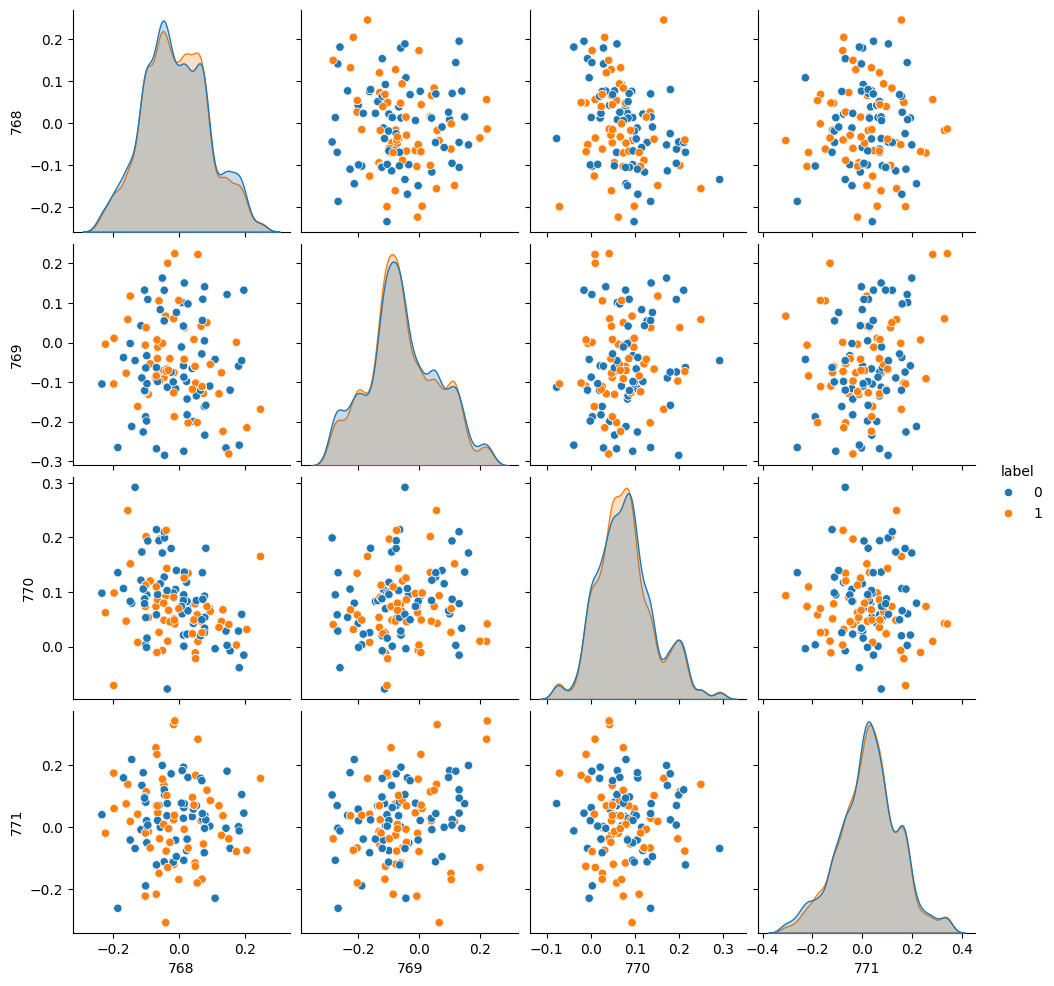

In [9]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced visualization capabilities

# Load the dataset from a .npz file
train_feat = np.load("./drive/MyDrive/datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']  # Extract features
train_feat_Y = train_feat['label']  # Extract labels

# Flatten each (13, 768) matrix into a (13 * 768 = 9984) vector
flattened_X = train_feat_X.reshape(train_feat_X.shape[0], -1)

# Convert the flattened features to a DataFrame
df_X = pd.DataFrame(flattened_X)
df_Y = pd.DataFrame(train_feat_Y, columns=["label"])  # Convert labels to a DataFrame with a specified column name

# Remove columns where max and min are the same (i.e., columns with unique values)
df_X_filtered = df_X.loc[:, (df_X.max() != df_X.min())]

# Check shape after removing constant columns
print("Original Feature Shape (X):", df_X.shape)
print("Filtered Feature Shape (X):", df_X_filtered.shape)

# Proceed with Data Analysis on Filtered Data
print("Label Shape (Y):", df_Y.shape)

# Check for missing values in features and labels
print("Missing values in features:", df_X_filtered.isnull().sum().sum())
print("Missing values in labels:", df_Y.isnull().sum().sum())

# Basic statistics of the filtered feature dataset
print("Feature dataset statistics:\n", df_X_filtered.describe())

# # Uncomment to visualize the distribution of labels
# plt.figure(figsize=(6, 4))
# sns.countplot(df_Y['label'])
# plt.title("Distribution of Labels")
# plt.show()

# # Uncomment to visualize the correlation matrix (only works if features are numeric)
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_X_filtered.corr(), annot=False, cmap='coolwarm')  # Large features, so remove annotation
# plt.title("Correlation Matrix (Filtered Flattened Features)")
# plt.show()

# Check unique values in the first 10 features (after filtering)
for col in df_X_filtered.columns[:10]:  # Displaying only first 10 features for brevity
    print(f"Unique values in feature {col}: {df_X_filtered[col].nunique()}")

# Plot feature distributions for the first 20 features
df_X_filtered.iloc[:, :20].hist(figsize=(16, 12), bins=20, edgecolor='black')  # Plot first 20 features
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Pair plot for a subset of features (first 4 features)
subset_df = pd.concat([df_X_filtered.iloc[:, :4], df_Y], axis=1)  # Combine first 4 features with labels
sns.pairplot(subset_df, hue='label')  # Create pair plot with hue based on labels
plt.show()

Original Shape: (7080, 2304)
Shape after PCA: (7080, 194)


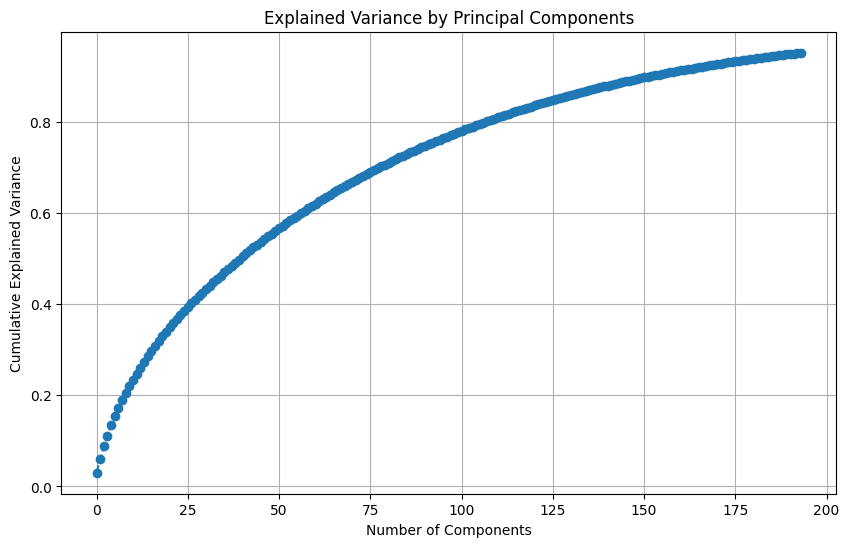

PCA-transformed dataset statistics:
                 0             1             2             3             4    \
count  7.080000e+03  7.080000e+03  7.080000e+03  7.080000e+03  7.080000e+03   
mean  -7.925734e-07  7.058267e-08 -8.931941e-07  4.006644e-07  3.666528e-07   
std    7.025515e-01  6.943734e-01  6.812181e-01  6.194286e-01  6.160945e-01   
min   -1.541682e+00 -1.496451e+00 -1.899038e+00 -1.611570e+00 -1.772345e+00   
25%   -5.306967e-01 -6.186290e-01 -4.736580e-01 -4.184608e-01 -3.848098e-01   
50%   -6.490015e-02  1.899164e-01 -4.532989e-03  1.683899e-01  1.592438e-01   
75%    4.932671e-01  6.064089e-01  5.029946e-01  5.072486e-01  4.982093e-01   
max    1.953115e+00  1.137295e+00  1.675855e+00  1.054604e+00  9.374001e-01   

                5             6             7            8             9    \
count  7.080000e+03  7.080000e+03  7.080000e+03  7080.000000  7.080000e+03   
mean  -1.196134e-07 -3.854434e-07  3.087318e-07     0.000000 -2.214464e-07   
std    5.639852e-

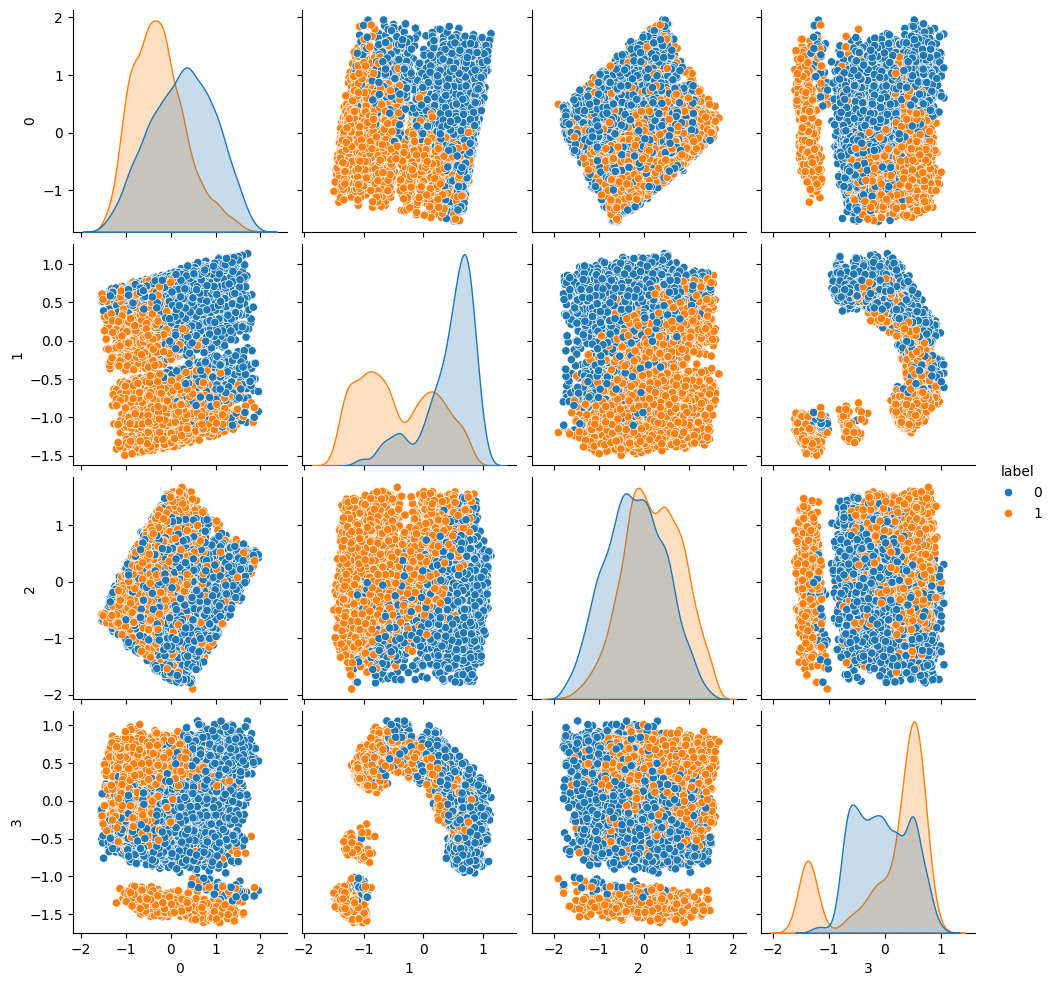

In [10]:
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
import matplotlib.pyplot as plt  # For plotting

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of the variance
df_X_pca = pca.fit_transform(df_X_filtered)  # Fit PCA and transform the data

# Check the shape after PCA
print("Original Shape:", df_X_filtered.shape)  # Shape of the original dataset
print("Shape after PCA:", df_X_pca.shape)  # Shape after applying PCA

# Plot explained variance ratio of each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')  # Cumulative explained variance
plt.xlabel('Number of Components')  # X-axis label
plt.ylabel('Cumulative Explained Variance')  # Y-axis label
plt.title('Explained Variance by Principal Components')  # Title of the plot
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

# Analysis on transformed data (PCA Components)
df_X_pca = pd.DataFrame(df_X_pca)  # Convert PCA components to a DataFrame

# Basic statistics of the PCA-transformed feature dataset
print("PCA-transformed dataset statistics:\n", df_X_pca.describe())  # Descriptive statistics

# Pairplot of the first 4 PCA components (optional for visualization)
subset_pca_df = pd.concat([df_X_pca.iloc[:, :4], df_Y], axis=1)  # Combine first 4 PCA components with labels
sns.pairplot(subset_pca_df, hue='label')  # Create pair plot with hue based on labels
plt.show()  # Display the pair plot

##Best Model

Removed 7680 constant columns out of 9984 total columns.
Reduced dimensions from 2304 to 215 after PCA.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

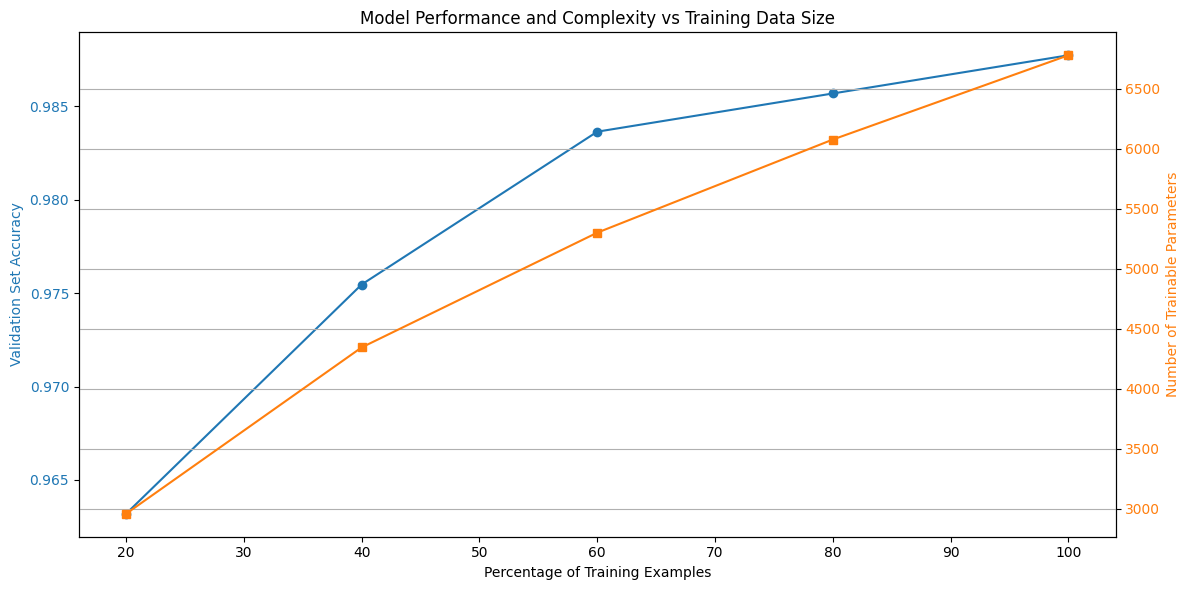

Training sizes: [0.2, 0.4, 0.6, 0.8, 1.0]
Accuracies: [0.9631901840490797, 0.9754601226993865, 0.983640081799591, 0.9856850715746421, 0.9877300613496932]
Parameter counts: [2958, 4344, 5300, 6076, 6778]
Saving predictions to file...


In [11]:
import numpy as np  # For numerical operations and handling datasets
from sklearn.preprocessing import StandardScaler  # For feature normalization (mean=0, std=1)
from sklearn.decomposition import PCA  # For dimensionality reduction to retain key information
from sklearn.svm import SVC  # Support Vector Classifier (though not used in this code)
import xgboost as xgb  # XGBoost for building efficient classifiers
from sklearn.metrics import accuracy_score  # To evaluate model accuracy
import matplotlib.pyplot as plt  # For visualizing results using plots

# Function to load training and validation data from specified paths
def load_data(train_path, val_path, test_path):
    data_train = np.load(train_path, allow_pickle=True)  # Load training data (.npz format)
    features_train = data_train['features']  # Extract features from training data
    labels_train = data_train['label']  # Extract labels from training data
    data_val = np.load(val_path, allow_pickle=True)  # Load validation data
    features_val = data_val['features']  # Extract features from validation data
    labels_val = data_val['label']  # Extract labels from validation data
    data_test = np.load(test_path, allow_pickle=True)  # Load test data
    features_test = data_test['features']  # Extract features from test data
    return features_train, features_val, labels_train, labels_val, features_test  # Return loaded data

# Function to remove constant columns that don’t vary across samples
def remove_constant_columns(features_train, features_val, features_test):
    n_samples_train, n_emoticons, n_dimensions = features_train.shape  # Get shape of training features
    features_train_reshaped = features_train.reshape(n_samples_train, -1)  # Flatten to 2D array
    features_val_reshaped = features_val.reshape(features_val.shape[0], -1)  # Flatten validation features similarly
    features_test_reshaped = features_test.reshape(features_test.shape[0], -1)  # Flatten test features similarly

    # Identify columns where all values are identical (constant) across the training set
    constant_columns = np.all(features_train_reshaped == features_train_reshaped[0, :], axis=0)

    # Remove constant columns from both training and validation data
    features_train_filtered = features_train_reshaped[:, ~constant_columns]
    features_val_filtered = features_val_reshaped[:, ~constant_columns]
    features_test_filtered = features_test_reshaped[:, ~constant_columns]

    print(f"Removed {np.sum(constant_columns)} constant columns out of {features_train_reshaped.shape[1]} total columns.")

    return features_train_filtered, features_val_filtered, features_test_filtered  # Return filtered features

# Function to preprocess features (remove constants, normalize, and apply PCA)
def preprocess_features(features_train, features_val, features_test):
    features_train_filtered, features_val_filtered, features_test_filtered = remove_constant_columns(features_train, features_val, features_test)  # Step 1: Remove constants

    scaler = StandardScaler()  # Initialize standard scaler for normalization
    features_train_normalized = scaler.fit_transform(features_train_filtered)  # Fit and transform training data
    features_val_normalized = scaler.transform(features_val_filtered)  # Transform validation data using same scaler
    features_test_normalized = scaler.transform(features_test_filtered)  # Transform test data using same scaler

    # Apply PCA to reduce dimensionality, retaining 95% of the variance
    pca = PCA(n_components=0.95)
    features_train_pca = pca.fit_transform(features_train_normalized)  # Fit PCA on training data
    features_val_pca = pca.transform(features_val_normalized)  # Apply PCA on validation data
    features_test_pca = pca.transform(features_test_normalized)  # Apply PCA on test data

    print(f"Reduced dimensions from {features_train_filtered.shape[1]} to {features_train_pca.shape[1]} after PCA.")

    return features_train_pca, features_val_pca, features_test_pca  # Return preprocessed features

# Function to count the number of trainable parameters in an XGBoost model
def count_trainable_parameters(model):
    booster = model.get_booster()  # Get the XGBoost booster object
    trees = booster.get_dump()  # Extract individual trees from the booster
    n_params = sum(tree.count('\n') for tree in trees)  # Count the number of nodes across all trees
    return n_params  # Return total parameter count

# Function to train the XGBoost model and evaluate it
def train_and_evaluate(X_train, y_train, X_val, y_val):
    # Initialize the XGBoost classifier with specific hyperparameters
    model = xgb.XGBClassifier(
        use_label_encoder=False, eval_metric='logloss',  # Disable label encoding and use log loss metric
        colsample_bytree=0.8, learning_rate=0.2,  # Set learning rate and column sample fraction
        max_depth=5, n_estimators=300, subsample=1.0  # Define tree depth, number of estimators, and data sampling
    )
    model.fit(X_train, y_train)  # Train the model on training data
    y_pred = model.predict(X_val)  # Make predictions on the validation data

    accuracy = accuracy_score(y_val, y_pred)  # Compute validation accuracy
    n_params = count_trainable_parameters(model)  # Count total parameters in the model

    return accuracy, n_params, model  # Return accuracy, parameter count, and the trained model

# Function to experiment with different fractions of training data
def experiment_with_training_sizes(X_train, y_train, X_val, y_val):
    training_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]  # Define different fractions of data to use
    accuracies = []  # Store accuracies for each fraction
    param_counts = []  # Store parameter counts for each model
    models = []  # Store trained models

    # Iterate through each training size fraction
    for size in training_sizes:
        n_samples = int(len(X_train) * size)  # Calculate the number of samples to use
        X_train_subset = X_train[:n_samples]  # Subset the training features
        y_train_subset = y_train[:n_samples]  # Subset the training labels

        # Train the model and evaluate its performance
        accuracy, n_params, model = train_and_evaluate(X_train_subset, y_train_subset, X_val, y_val)
        accuracies.append(accuracy)  # Store accuracy
        param_counts.append(n_params)  # Store parameter count
        models.append(model)  # Store the trained model

    return training_sizes, accuracies, param_counts, models  # Return results

# Function to plot the results of the training size experiment
def plot_results(training_sizes, accuracies, param_counts):
    fig, ax1 = plt.subplots(figsize=(12, 6))  # Create a figure with one subplot

    ax1.set_xlabel('Percentage of Training Examples')  # Label for x-axis
    ax1.set_ylabel('Validation Set Accuracy', color='tab:blue')  # y-axis label for accuracy
    ax1.plot(np.array(training_sizes) * 100, accuracies, marker='o', color='tab:blue')  # Plot accuracy vs size
    ax1.tick_params(axis='y', labelcolor='tab:blue')  # Set y-axis tick colors for accuracy

    ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
    ax2.set_ylabel('Number of Trainable Parameters', color='tab:orange')  # y-axis label for parameter count
    ax2.plot(np.array(training_sizes) * 100, param_counts, marker='s', color='tab:orange')  # Plot parameters vs size
    ax2.tick_params(axis='y', labelcolor='tab:orange')  # Set y-axis tick colors for parameters

    plt.title('Model Performance and Complexity vs Training Data Size')  # Plot title
    plt.grid(True)  # Enable grid for easier visualization
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

# Main execution block
train_path = "./drive/MyDrive/datasets/train/train_feature.npz"  # Path to training data
val_path = "./drive/MyDrive/datasets/valid/valid_feature.npz"  # Path to validation data
test_path = "./drive/MyDrive/datasets/test/test_feature.npz"
# Load the data
features_train, features_val, y_train, y_val, features_test = load_data(train_path, val_path, test_path)

# Preprocess the features (normalize, remove constants, and apply PCA)
X_train, X_val, X_test = preprocess_features(features_train, features_val, features_test)

# Experiment with different training sizes and evaluate models
training_sizes, accuracies, param_counts, models = experiment_with_training_sizes(X_train, y_train, X_val, y_val)

# Make predictions using the last trained model
y2_train_pred = models[-1].predict(X_train)  # Predict on training data
y2_val_pred = models[-1].predict(X_val)  # Predict on validation data
y2_test_pred = models[-1].predict(X_test)  # Predict on test data

# Plot the results of the experiment
plot_results(training_sizes, accuracies, param_counts)

# Print results summary
print("Training sizes:", training_sizes)
print("Accuracies:", accuracies)
print("Parameter counts:", param_counts)

# Save predictions to file
print("Saving predictions to file...")
pd.DataFrame({'prediction': y2_test_pred}).to_csv('pred_deep_features.txt', index=False, header=False)


#3.Text Sequence Dataset

##Data Analysis

Training Data Analysis:
Dataset shape: (7080, 2)

Column names:
Index(['input_str', 'label'], dtype='object')

Data types:
input_str    object
label         int64
dtype: object

Missing values:
input_str    0
label        0
dtype: int64

Label distribution:
label
0    0.505085
1    0.494915
Name: proportion, dtype: float64


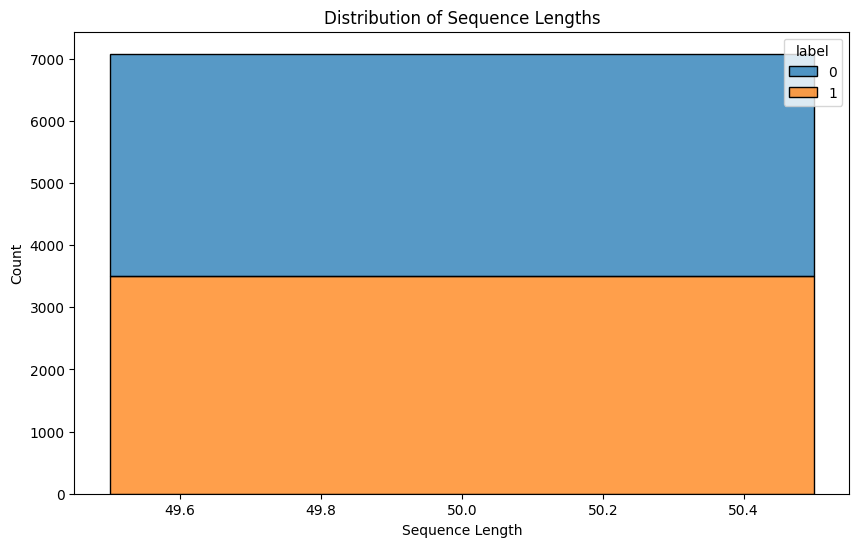

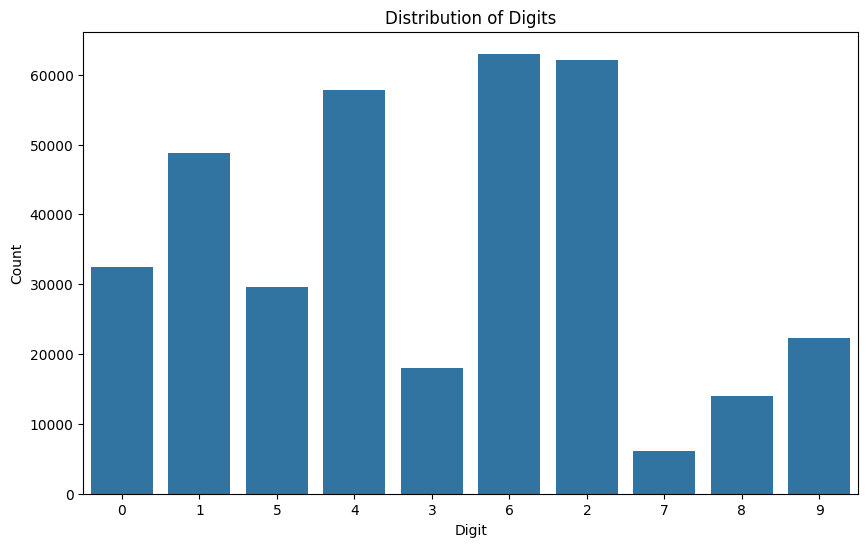

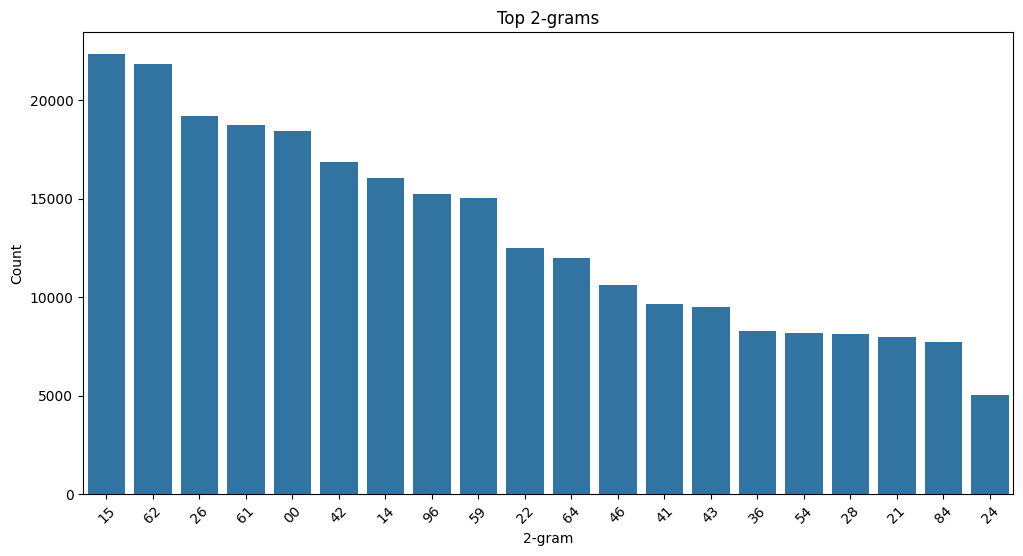

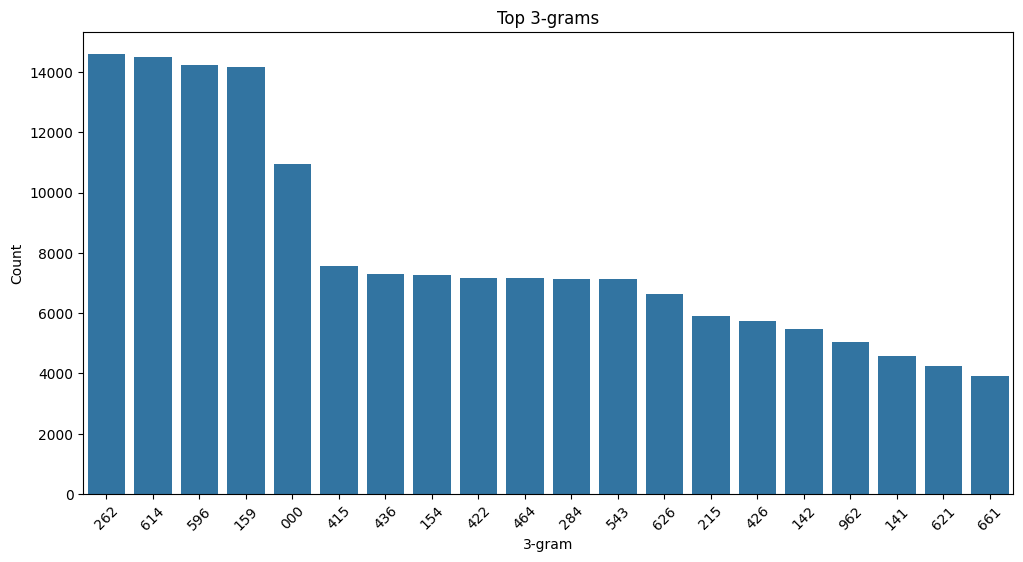

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


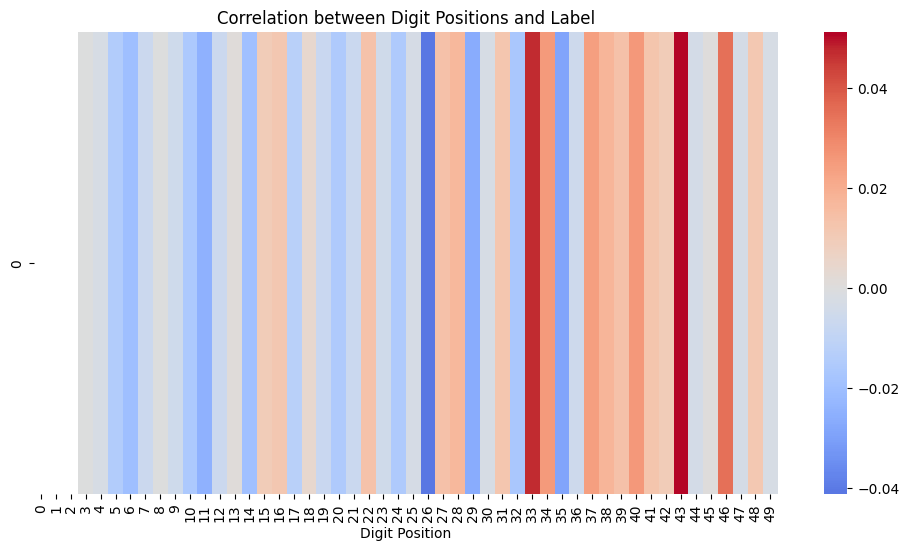


Validation Data Analysis:
Dataset shape: (489, 2)

Column names:
Index(['input_str', 'label'], dtype='object')

Data types:
input_str    object
label         int64
dtype: object

Missing values:
input_str    0
label        0
dtype: int64

Label distribution:
label
0    0.515337
1    0.484663
Name: proportion, dtype: float64


In [ ]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting visualizations
import seaborn as sns  # Importing seaborn for enhanced data visualization
from collections import Counter  # Importing Counter from collections to count occurrences of elements
from sklearn.feature_extraction.text import CountVectorizer  # Importing CountVectorizer for n-gram analysis

# Function to load data from a CSV file
def load_data(file_path):
    return pd.read_csv(file_path)  # Read the CSV file and return the DataFrame

# Function to analyze the dataset
def analyze_dataset(data):
    print(f"Dataset shape: {data.shape}")  # Print the shape of the dataset (rows, columns)
    print("\nColumn names:")
    print(data.columns)  # Print the names of the columns in the DataFrame
    print("\nData types:")
    print(data.dtypes)  # Print the data types of each column
    print("\nMissing values:")
    print(data.isnull().sum())  # Print the count of missing values for each column
    print("\nLabel distribution:")
    print(data['label'].value_counts(normalize=True))  # Print normalized distribution of the labels

# Function to analyze the distribution of sequence lengths
def analyze_sequence_length(data):
    data['sequence_length'] = data['input_str'].str.len()  # Calculate the length of each input string
    plt.figure(figsize=(10, 6))  # Set figure size for the plot
    sns.histplot(data=data, x='sequence_length', hue='label', multiple='stack')  # Create a stacked histogram of sequence lengths
    plt.title('Distribution of Sequence Lengths')  # Set title for the plot
    plt.xlabel('Sequence Length')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis
    plt.show()  # Display the plot

# Function to analyze the distribution of digits in the input strings
def analyze_digit_distribution(data):
    all_digits = ''.join(data['input_str'])  # Combine all input strings into a single string
    digit_counts = Counter(all_digits)  # Count occurrences of each digit using Counter

    plt.figure(figsize=(10, 6))  # Set figure size for the plot
    sns.barplot(x=list(digit_counts.keys()), y=list(digit_counts.values()))  # Create a bar plot of digit counts
    plt.title('Distribution of Digits')  # Set title for the plot
    plt.xlabel('Digit')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis
    plt.show()  # Display the plot

# Function to analyze n-grams in the input strings
def analyze_ngrams(data, n=2):
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(n, n))  # Create a CountVectorizer for character n-grams
    ngrams = vectorizer.fit_transform(data['input_str'])  # Fit and transform the input strings to n-gram counts
    ngram_counts = ngrams.sum(axis=0).A1  # Sum the counts of each n-gram across all input strings
    ngram_names = vectorizer.get_feature_names_out()  # Get the names of the n-grams

    top_ngrams = sorted(zip(ngram_names, ngram_counts), key=lambda x: x[1], reverse=True)[:20]  # Get the top 20 n-grams

    plt.figure(figsize=(12, 6))  # Set figure size for the plot
    sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams])  # Create a bar plot for the top n-grams
    plt.title(f'Top {n}-grams')  # Set title for the plot
    plt.xlabel(f'{n}-gram')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()  # Display the plot

# Function to analyze the importance of digit positions
def analyze_position_importance(data):
    digit_positions = np.array([list(map(int, seq)) for seq in data['input_str']])  # Convert sequences of characters to digit positions
    # Calculate correlations between digit positions and labels using NumPy's corrcoef function
    label_correlations = np.array([np.corrcoef(digit_positions[:, i], data['label'])[0, 1] for i in range(50)])  # Calculate correlations for each position

    plt.figure(figsize=(12, 6))  # Set figure size for the heatmap
    sns.heatmap(label_correlations.reshape(1, -1), cmap='coolwarm', center=0)  # Create a heatmap of correlations
    plt.title('Correlation between Digit Positions and Label')  # Set title for the heatmap
    plt.xlabel('Digit Position')  # Label for the x-axis
    plt.show()  # Display the heatmap

# Main function to execute the analysis
def main():
    train_data = load_data('./drive/MyDrive/datasets/train/train_text_seq.csv')  # Load training data from CSV file
    val_data = load_data('./drive/MyDrive/datasets/valid/valid_text_seq.csv')  # Load validation data from CSV file

    print("Training Data Analysis:")
    analyze_dataset(train_data)  # Analyze the training data
    analyze_sequence_length(train_data)  # Analyze the distribution of sequence lengths in the training data
    analyze_digit_distribution(train_data)  # Analyze the distribution of digits in the training data
    analyze_ngrams(train_data, n=2)  # Analyze 2-grams in the training data
    analyze_ngrams(train_data, n=3)  # Analyze 3-grams in the training data
    analyze_position_importance(train_data)  # Analyze the importance of digit positions in the training data

    print("\nValidation Data Analysis:")
    analyze_dataset(val_data)  # Analyze the validation data

# Execute the main function if the script is run as the main module
if __name__ == "__main__":
    main()  # Call the main function to start the analysis


##Attempt 1 without NN

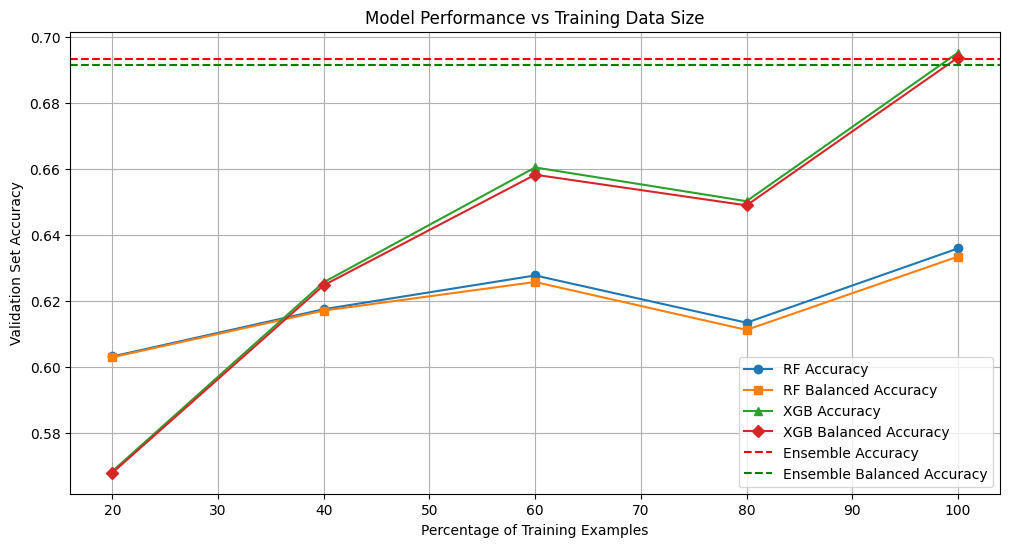

Random Forest Results:
Training sizes: [0.2, 0.4, 0.6, 0.8, 1.0]
Accuracies: [0.6032719836400818, 0.6175869120654397, 0.6278118609406953, 0.6134969325153374, 0.6359918200408998]
Balanced Accuracies: [0.6030239099859354, 0.6171639541892706, 0.6258288125376733, 0.6113120353626682, 0.6335141651597348]

XGBoost Results:
Training sizes: [0.2, 0.4, 0.6, 0.8, 1.0]
Accuracies: [0.5685071574642127, 0.6257668711656442, 0.6605316973415133, 0.6503067484662577, 0.6952965235173824]
Balanced Accuracies: [0.5680379746835443, 0.6248493068113321, 0.6583283102270444, 0.6490355635925256, 0.6938165561583283]

Ensemble Results:
Accuracy: 0.6932515337423313
Balanced Accuracy: 0.6914556962025317

Best Random Forest Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 13, 'min_weight_fraction_leaf': 0.0, 'mon

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt

# Function to load the training and validation data
def load_data(train_path, val_path):
    # Read the CSV files into pandas DataFrames
    train_data = pd.read_csv(train_path)
    val_data = pd.read_csv(val_path)
    return train_data, val_data

# Function to preprocess the input data
def preprocess_data(data):
    # Extract the input strings and labels from the DataFrame
    X = data['input_str'].values
    y = data['label'].astype(int).values  # Ensure labels are integers
    return X, y

# Function to extract features from the input strings
def extract_features(X):
    # Convert input strings to numerical arrays
    X_numeric = np.array([list(map(int, s)) for s in X])

    # Basic statistical features
    basic_features = np.column_stack([
        np.mean(X_numeric, axis=1),
        np.std(X_numeric, axis=1),
        np.max(X_numeric, axis=1),
        np.min(X_numeric, axis=1),
        np.median(X_numeric, axis=1),
        np.sum(X_numeric, axis=1)
    ])

    # Frequency features: Count occurrences of each integer (0-9)
    freq_features = np.array([np.bincount(x, minlength=10) for x in X_numeric])

    # Positional features: Every 5th position of the numeric array
    pos_features = X_numeric[:, ::5]

    # Differences between adjacent elements as new features
    diff_features = np.diff(X_numeric, axis=1)
    diff_stats = np.column_stack([
        np.mean(diff_features, axis=1),
        np.std(diff_features, axis=1),
        np.max(diff_features, axis=1),
        np.min(diff_features, axis=1)
    ])

    # Rolling statistics: Compute rolling mean and standard deviation with a window size of 5
    rolling_mean = np.array([np.convolve(x, np.ones(5), 'valid') / 5 for x in X_numeric])
    rolling_stats = np.column_stack([
        np.mean(rolling_mean, axis=1),
        np.std(rolling_mean, axis=1),
        np.max(rolling_mean, axis=1),
        np.min(rolling_mean, axis=1)
    ])

    # Combine all extracted features into a single array
    features = np.hstack([X_numeric, basic_features, freq_features, pos_features,
                          diff_stats, rolling_stats])

    return features

# Function to train and evaluate a model
def train_and_evaluate(X_train, y_train, X_val, y_val, model_type='rf'):
    # Choose model type
    if model_type == 'rf':
        # Set parameters for Random Forest
        model = RandomForestClassifier(random_state=42, n_estimators=413, max_depth=25,
                                       min_samples_split=13, min_samples_leaf=1,
                                       max_features='sqrt')
    elif model_type == 'xgb':
        # Set parameters for XGBoost
        model = XGBClassifier(random_state=42, n_estimators=466, max_depth=4,
                              learning_rate=0.1266031869068446, subsample=0.9314950036607718)

    # Train the model on the training data
    best_model = model
    best_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Calculate accuracy and balanced accuracy
    accuracy = accuracy_score(y_val, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_val, y_pred)

    return accuracy, balanced_accuracy, best_model

# Function to experiment with different training sizes
def experiment_with_training_sizes(X_train, y_train, X_val, y_val, model_type='rf'):
    # Define the proportions of the training data to use
    training_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
    accuracies = []
    balanced_accuracies = []
    best_models = []

    # Loop through each training size
    for size in training_sizes:
        n_samples = int(len(X_train) * size)  # Calculate number of samples for current size
        X_train_subset = X_train[:n_samples]  # Select subset of training data
        y_train_subset = y_train[:n_samples]   # Select corresponding labels

        # Train and evaluate the model
        accuracy, balanced_accuracy, best_model = train_and_evaluate(X_train_subset, y_train_subset, X_val, y_val, model_type)
        accuracies.append(accuracy)  # Store accuracy
        balanced_accuracies.append(balanced_accuracy)  # Store balanced accuracy
        best_models.append(best_model)  # Store the best model

    return training_sizes, accuracies, balanced_accuracies, best_models

# Function to plot results of the experiments
def plot_results(training_sizes, rf_accuracies, rf_balanced_accuracies,
                 xgb_accuracies, xgb_balanced_accuracies, ensemble_accuracy, ensemble_balanced_accuracy):
    plt.figure(figsize=(12, 6))
    plt.plot(np.array(training_sizes) * 100, rf_accuracies, marker='o', label='RF Accuracy')
    plt.plot(np.array(training_sizes) * 100, rf_balanced_accuracies, marker='s', label='RF Balanced Accuracy')
    plt.plot(np.array(training_sizes) * 100, xgb_accuracies, marker='^', label='XGB Accuracy')
    plt.plot(np.array(training_sizes) * 100, xgb_balanced_accuracies, marker='D', label='XGB Balanced Accuracy')
    plt.axhline(y=ensemble_accuracy, color='r', linestyle='--', label='Ensemble Accuracy')
    plt.axhline(y=ensemble_balanced_accuracy, color='g', linestyle='--', label='Ensemble Balanced Accuracy')

    plt.xlabel('Percentage of Training Examples')
    plt.ylabel('Validation Set Accuracy')
    plt.title('Model Performance vs Training Data Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
train_path = "./drive/MyDrive/datasets/train/train_text_seq.csv"
val_path = "./drive/MyDrive/datasets/valid/valid_text_seq.csv"

# Load the data
train_data, val_data = load_data(train_path, val_path)

# Preprocess the data
X_train, y_train = preprocess_data(train_data)
X_val, y_val = preprocess_data(val_data)

# Extract features from the training and validation sets
X_train_features = extract_features(X_train)
X_val_features = extract_features(X_val)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)

# Experiment with Random Forest and XGBoost models
rf_results = experiment_with_training_sizes(X_train_scaled, y_train, X_val_scaled, y_val, 'rf')
xgb_results = experiment_with_training_sizes(X_train_scaled, y_train, X_val_scaled, y_val, 'xgb')

# Ensemble method using VotingClassifier
rf_model = rf_results[3][-1]  # Best RF model from full dataset
xgb_model = xgb_results[3][-1]  # Best XGB model from full dataset

# Train the ensemble model
ensemble = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'  # Use soft voting for ensemble
)

# Fit the ensemble model
ensemble.fit(X_train_scaled, y_train)

# Make predictions and evaluate ensemble model
ensemble_pred = ensemble.predict(X_val_scaled)
ensemble_accuracy = accuracy_score(y_val, ensemble_pred)
ensemble_balanced_accuracy = balanced_accuracy_score(y_val, ensemble_pred)

# Plot the results
plot_results(rf_results[0], rf_results[1], rf_results[2],
             xgb_results[1], xgb_results[2],
             ensemble_accuracy, ensemble_balanced_accuracy)

# Print results for all models
print("Random Forest Results:")
print("Training sizes:", rf_results[0])
print("Accuracies:", rf_results[1])
print("Balanced Accuracies:", rf_results[2])

print("\nXGBoost Results:")
print("Training sizes:", xgb_results[0])
print("Accuracies:", xgb_results[1])
print("Balanced Accuracies:", xgb_results[2])

print("\nEnsemble Results:")
print("Accuracy:", ensemble_accuracy)
print("Balanced Accuracy:", ensemble_balanced_accuracy)

# Print the best hyperparameters for both models
print("\nBest Random Forest Hyperparameters:", rf_results[3][-1].get_params())
print("Best XGBoost Hyperparameters:", xgb_results[3][-1].get_params())


#Best Model for Dataset 3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 47, 4)               │           8,004 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 23, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 22, 8)               │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 11, 8)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             356 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,437 (32.96 KB)

 Trainable params: 8,437 (32.96 KB)

 Non-trainable params: 0 (0.00 B)

Total number of parameters in the model: 8437
Trainable parameters: 8437
Non-trainable parameters: 0.0
Epoch 1/18
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4991 - loss: 0.6933 - val_accuracy: 0.5174 - val_loss: 0.6923
Epoch 2/18
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5156 - loss: 0.6913 - val_accuracy: 0.5971 - val_loss: 0.6873
Epoch 3/18
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.5659 - loss: 0.6800 - val_accuracy: 0.7260 - val_loss: 0.6428
Epoch 4/18
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6845 - loss: 0.6006 - val_accuracy: 0.8139 - val_loss: 0.4972
Epoch 5/18
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7388 - loss: 0.5039 - val_accuracy: 0.8425 - val_loss: 0.4075
Epoch 6/18
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7753 - loss: 0.4395 - val_accuracy: 0.8548 - val_loss: 0.3703
Epoch 7/18
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7956 - loss: 0.4096 - val_accuracy: 0.8466 - val_loss: 0

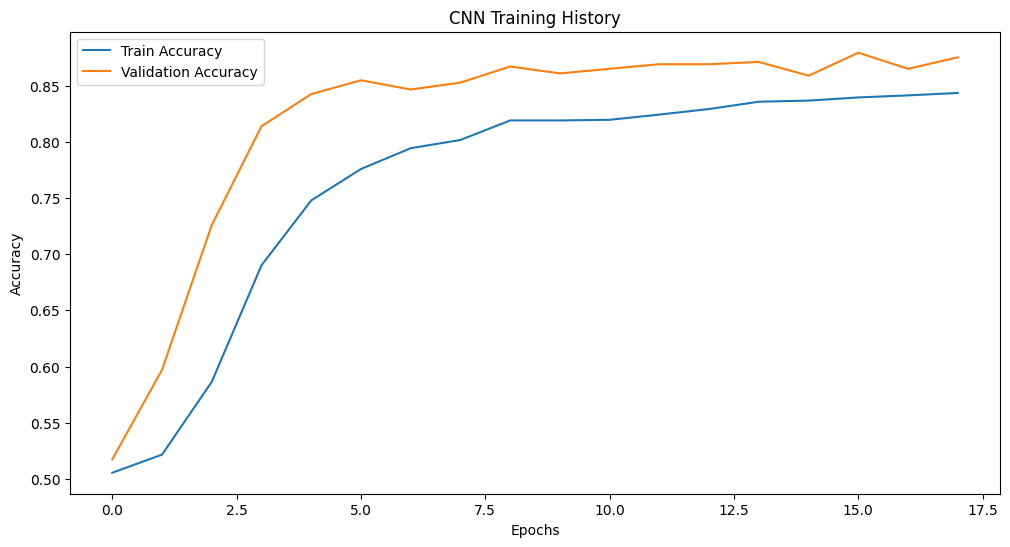

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

# File paths for the training, validation, and test datasets
train_path = "./drive/MyDrive/datasets/train/train_text_seq.csv"
val_path = "./drive/MyDrive/datasets/valid/valid_text_seq.csv"
test_path = "./drive/MyDrive/datasets/test/test_text_seq.csv"

# Load the datasets using pandas
train_data = pd.read_csv(train_path)  # Load training data
val_data = pd.read_csv(val_path)      # Load validation data
test_data = pd.read_csv(test_path)    # Load test data

# Function to preprocess the data
def preprocess_data(data):
    # Extract input strings and labels from the DataFrame
    X = data['input_str'].tolist()  # Convert input strings to a list
    y = data['label'].tolist()       # Convert corresponding labels to a list
    return X, np.array(y)            # Return inputs as a list and labels as a numpy array

# Preprocess the training, validation, and test datasets
X_train, y_train = preprocess_data(train_data)  # Preprocess training data
X_val, y_val = preprocess_data(val_data)        # Preprocess validation data
X_test = test_data['input_str'].tolist()        # Extract input strings from test data (no labels)

# Define three-digit pairs (trigrams) and map each pair to an index
unique_trigrams = [f"{i:03d}" for i in range(1000)]  # Generate trigrams from '000' to '999'
num_trigrams = len(unique_trigrams)                   # Total number of unique trigrams
trigram_to_index = {trigram: idx for idx, trigram in enumerate(unique_trigrams)}  # Create mapping

# Function to convert input sequences to a one-hot encoded matrix using overlapping trigrams
def one_hot_count_matrix_trigram(seq, max_len=50):
    # Initialize a zero matrix of shape (max_len-2, number of trigrams)
    matrix = np.zeros((max_len - 2, num_trigrams))
    for i in range(max_len - 2):
        trigram = seq[i:i + 3]  # Extract the current trigram (3 characters)
        if trigram in trigram_to_index:  # Check if the trigram exists in the mapping
            index = trigram_to_index[trigram]  # Get the index for the trigram
            matrix[i, index] = 1  # Set the corresponding position in the matrix to 1
    return matrix  # Return the one-hot encoded matrix

# Create the training, validation, and test datasets by applying the one-hot encoding function
X_train_processed = np.array([one_hot_count_matrix_trigram(seq) for seq in X_train])  # Process training data
X_val_processed = np.array([one_hot_count_matrix_trigram(seq) for seq in X_val])      # Process validation data
X_test_processed = np.array([one_hot_count_matrix_trigram(seq) for seq in X_test])    # Process test data

# Construct a Convolutional Neural Network (CNN) model
cnn_model = models.Sequential()  # Initialize a sequential model

# First convolutional layer with reduced filters and kernel size
cnn_model.add(layers.Conv1D(filters=4, kernel_size=2, activation='relu', input_shape=(48, 1000)))
cnn_model.add(layers.MaxPooling1D(pool_size=2))  # Max pooling layer to reduce dimensionality

# Second convolutional layer
cnn_model.add(layers.Conv1D(filters=8, kernel_size=2, activation='relu'))
cnn_model.add(layers.MaxPooling1D(pool_size=2))  # Another max pooling layer

# Flatten the output to connect to dense layers
cnn_model.add(layers.Flatten())  # Convert 3D outputs to 1D

# Dense layer with a minimal number of units
cnn_model.add(layers.Dense(4, activation='relu'))  # Dense layer to learn complex features
cnn_model.add(layers.Dropout(0.5))  # Dropout layer to prevent overfitting

# Final output layer for binary classification
cnn_model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid activation for binary output (0 or 1)

# Compile the CNN model with Adam optimizer and binary crossentropy loss
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile model

# Display model summary to show the architecture, including trainable and non-trainable parameters
cnn_model.summary()

# Count total parameters in the model
num_params = cnn_model.count_params()  # Total parameters in the model
trainable_params = np.sum([K.count_params(p) for p in cnn_model.trainable_weights])  # Count of trainable parameters
non_trainable_params = np.sum([K.count_params(p) for p in cnn_model.non_trainable_weights])  # Count of non-trainable parameters

# Print the total number of parameters
print(f"Total number of parameters in the model: {num_params}")
print(f"Trainable parameters: {trainable_params}")
print(f"Non-trainable parameters: {non_trainable_params}")

# Train the CNN model with the training dataset
training_history = cnn_model.fit(X_train_processed, y_train,
                                  validation_data=(X_val_processed, y_val),
                                  epochs=18, batch_size=64)  # Fit the model to the training data

# Evaluate the model on the validation set
val_loss, val_accuracy = cnn_model.evaluate(X_val_processed, y_val)  # Evaluate model performance
print(f"Validation Accuracy with CNN: {val_accuracy:.4f}")  # Print validation accuracy

# Predict on the test set
test_predictions = cnn_model.predict(X_test_processed)  # Make predictions on the test data
test_predictions = (test_predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels (0 or 1)

# Save predictions to file
print("Saving predictions to file...")
pd.DataFrame({'prediction': test_predictions}).to_csv('pred_text_seq.txt', index=False, header=False)

# Predict on the train set
train_predictions = cnn_model.predict(X_train_processed)  # Make predictions on the train data
y3_train_pred = (train_predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels (0 or 1)

# Predict on the val set
val_predictions = cnn_model.predict(X_val_processed)  # Make predictions on the val data
y3_val_pred = (val_predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels (0 or 1)


# Plotting training history
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.plot(training_history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('CNN Training History')  # Title of the plot
plt.legend()  # Show legend for the plot
plt.show()  # Display the plot


Task 3 Model with validation accuracies at various data points

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trained with 20.0% of the training data. Validation accuracy: 0.7914
Trained with 40.0% of the training data. Validation accuracy: 0.8282
Trained with 60.0% of the training data. Validation accuracy: 0.8241
Trained with 80.0% of the training data. Validation accuracy: 0.8609
Trained with 100.0% of the training data. Validation accuracy: 0.8916


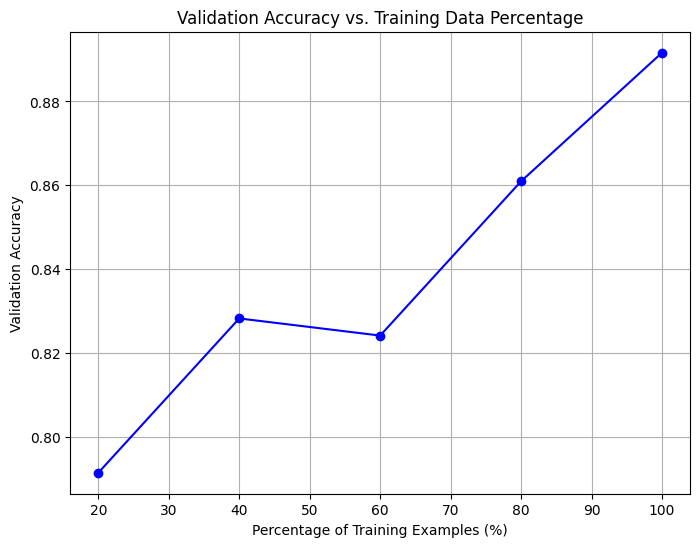

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation using DataFrames
from sklearn.preprocessing import StandardScaler  # For standardizing data
import tensorflow as tf  # TensorFlow library for building neural networks
from tensorflow.keras import layers, models  # Layers and model building tools from Keras
import tensorflow.keras.backend as K  # Keras backend for additional functionality
import matplotlib.pyplot as plt  # For visualizing results with plots

# File paths for the training, validation, and test datasets
train_path = "./drive/MyDrive/datasets/train/train_text_seq.csv"  # Path to the training data
val_path = "./drive/MyDrive/datasets/valid/valid_text_seq.csv"  # Path to the validation data
test_path = "./drive/MyDrive/datasets/test/test_text_seq.csv"  # Path to the test data

# Load the datasets using pandas for easy manipulation
train_data = pd.read_csv(train_path)  # Load training data into DataFrame
val_data = pd.read_csv(val_path)  # Load validation data into DataFrame
test_data = pd.read_csv(test_path)  # Load test data into DataFrame

# Function to preprocess the data by extracting inputs and labels
def preprocess_data(data):
    X = data['input_str'].tolist()  # Extract input sequences as a list
    y = data['label'].tolist()  # Extract corresponding labels as a list
    return X, np.array(y)  # Convert labels to numpy array and return both inputs and labels

# Preprocess the training, validation, and test datasets
X_train, y_train = preprocess_data(train_data)  # Process training data
X_val, y_val = preprocess_data(val_data)  # Process validation data
X_test = test_data['input_str'].tolist()  # Extract only inputs from test data

# Generate all possible three-digit numeric strings ('000' to '999') as trigrams
unique_trigrams = [f"{i:03d}" for i in range(1000)]  # Create all possible trigrams
num_trigrams = len(unique_trigrams)  # Total number of unique trigrams (1000)
# Create a dictionary mapping each trigram to a unique index
trigram_to_index = {trigram: idx for idx, trigram in enumerate(unique_trigrams)}

# Function to convert input sequences into one-hot encoded matrices based on overlapping trigrams
def one_hot_count_matrix_trigram(seq, max_len=50):
    # Initialize a matrix of shape (max_len-2, 1000) with zeros
    matrix = np.zeros((max_len - 2, num_trigrams))
    # Loop over the sequence to extract trigrams and fill the one-hot matrix
    for i in range(max_len - 2):
        trigram = seq[i:i + 3]  # Extract a trigram (3 consecutive characters)
        if trigram in trigram_to_index:  # If the trigram is in the mapping
            index = trigram_to_index[trigram]  # Get the corresponding index
            matrix[i, index] = 1  # Set the appropriate position in the matrix to 1
    return matrix  # Return the resulting matrix

# Convert the training, validation, and test inputs to one-hot encoded matrices
X_train_processed = np.array([one_hot_count_matrix_trigram(seq) for seq in X_train])  # Process training inputs
X_val_processed = np.array([one_hot_count_matrix_trigram(seq) for seq in X_val])  # Process validation inputs
X_test_processed = np.array([one_hot_count_matrix_trigram(seq) for seq in X_test])  # Process test inputs

# Function to build the CNN model for classification
def build_cnn_model():
    model = models.Sequential()  # Initialize a sequential model
    # Add a 1D convolutional layer with 4 filters and a kernel size of 2
    model.add(layers.Conv1D(filters=4, kernel_size=2, activation='relu', input_shape=(48, 1000)))
    model.add(layers.MaxPooling1D(pool_size=2))  # Add a max-pooling layer to reduce dimensionality
    model.add(layers.Conv1D(filters=8, kernel_size=2, activation='relu'))  # Add another conv layer
    model.add(layers.MaxPooling1D(pool_size=2))  # Add another pooling layer
    model.add(layers.Flatten())  # Flatten the output to connect to dense layers
    model.add(layers.Dense(4, activation='relu'))  # Add a dense layer with 4 units
    model.add(layers.Dropout(0.5))  # Add dropout for regularization
    model.add(layers.Dense(1, activation='sigmoid'))  # Final dense layer for binary classification
    # Compile the model using Adam optimizer and binary crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model  # Return the compiled model

# List to store validation accuracies for different training percentages
validation_accuracies = []

# Define different percentages of the training data to be used
training_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Fractions of the training data

# Loop through each training percentage to train and evaluate the model
for percent in training_percentages:
    # Calculate the number of examples to use for the current percentage
    num_examples = int(percent * len(X_train_processed))

    # Select a subset of the training data based on the current percentage
    X_train_subset = X_train_processed[:num_examples]  # Subset of inputs
    y_train_subset = y_train[:num_examples]  # Subset of labels

    # Build a new CNN model for the current experiment
    cnn_model = build_cnn_model()  # Initialize the model

    # Train the model using the current subset of training data
    cnn_model.fit(X_train_subset, y_train_subset,
                  epochs=18, batch_size=64,  # Train for 18 epochs with batch size 64
                  validation_data=(X_val_processed, y_val),  # Use validation set for evaluation
                  verbose=0)  # Suppress output during training

    # Evaluate the model on the validation data to get loss and accuracy
    val_loss, val_accuracy = cnn_model.evaluate(X_val_processed, y_val, verbose=0)

    # Store the validation accuracy for the current percentage
    validation_accuracies.append(val_accuracy)  # Append accuracy to the list
    # Print the results for the current experiment
    print(f"Trained with {percent * 100}% of the training data. Validation accuracy: {val_accuracy:.4f}")

# Plot the validation accuracy as a function of the training data percentage
plt.figure(figsize=(8, 6))  # Set the size of the plot
# Plot the validation accuracies against the training percentages
plt.plot(np.array(training_percentages) * 100, validation_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Percentage of Training Examples (%)')  # Label for the x-axis
plt.ylabel('Validation Accuracy')  # Label for the y-axis
plt.title('Validation Accuracy vs. Training Data Percentage')  # Plot title
plt.grid(True)  # Add gridlines to the plot
plt.show()  # Display the plot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Task2: Unified model

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Assume you have the following accuracies from previous models:
accuracy_model1 = 0.94  # Accuracy of the first model (predictions from model 1)
accuracy_model2 = 0.98  # Accuracy of the second model (predictions from model 2)
accuracy_model3 = 0.86  # Accuracy of the third model (predictions from model 3)

# Create a NumPy array to hold the accuracies of the models
weights = np.array([accuracy_model1, accuracy_model2, accuracy_model3])

# Normalize the weights so that they sum up to 1
weights = weights / weights.sum()  # This ensures that weights are proportionate to the accuracy of each model

# Stack the predictions from each model into a 2D array for both training and validation sets
# This assumes y1_train_pred, y2_train_pred, y3_train_pred are the predictions from the three models
X_train = np.stack([y1_train_pred, y2_train_pred, y3_train_pred], axis=1)  # Shape: (n_samples, 3)
X_val = np.stack([y1_valid_pred, y2_val_pred, y3_val_pred], axis=1)          # Shape: (n_samples, 3)

# Apply weights to the predictions by element-wise multiplication
# This gives more influence to predictions from models with higher accuracy
X_train_weighted = X_train * weights  # Shape remains (n_samples, 3)
X_val_weighted = X_val * weights        # Shape remains (n_samples, 3)

# Initialize and train the Random Forest Classifier
# You could also use LinearRegression or LogisticRegression depending on the problem
model = RandomForestClassifier()  # RandomForest is chosen for classification tasks
model.fit(X_train_weighted, y_train)  # Fit the model to the weighted training predictions and labels

# Make predictions on the validation data
y_pred = model.predict(X_val_weighted)  # Generate predictions for the validation set

# Evaluate the performance of the model
# Since this is a classification task, we round the predictions to get binary class labels (0 or 1)
accuracy = accuracy_score(y_val, y_pred.round())  # Calculate accuracy of the model
balanced_accuracy = balanced_accuracy_score(y_val, y_pred.round())  # Calculate balanced accuracy

# Print out the evaluation metrics
print(f"Accuracy: {accuracy}")  # Display the overall accuracy
print(f"Balanced Accuracy: {balanced_accuracy}")  # Display the balanced accuracy, which accounts for class imbalance


Accuracy: 0.9877300613496932
Balanced Accuracy: 0.987467349809122
